# Script to split an image into tiles and convert to halftone

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Source: https://github.com/philgyford/python-halftone
import halftone

%matplotlib inline

In [2]:
def make_image_tiles(source_dir, results_dir, filename, scale=1, dims=(1, 1)):
    """Splits image into equal-sized rectangular tiles based
    on the specified grid dimensions dims=(n_rows, n_columns).
    """
    im = Image.open(os.path.join(source_dir, filename)) 
    tile_width = im.size[0] / dims[1]
    tile_height = im.size[1] / dims[0]
    image_filenames = [];
    index = [];
    name, ext = os.path.splitext(filename)
    for row in range(dims[0]):
        for col in range(dims[1]):
            index.append((row, col))
            box = (col*tile_width, row*tile_height, (col + 1)*tile_width, (row + 1)*tile_height)
            im_crop = im.crop(box)
            if scale > 1:
                (width, height) = (im_crop.width * scale, im_crop.height * scale)
                im_crop_enlarged = im_crop.resize((width, height))
            else:
                im_crop_enlarged = im_crop
            crop_filename = f"{name}_crop_{row}_{col}.png";
            im_crop_enlarged.save(os.path.join(results_dir, crop_filename), "PNG")
            image_filenames.append(crop_filename)
    return index, image_filenames

In [3]:
source_dir = 'source'
results_dir = 'results'

if not os.path.isdir(source_dir):
    os.mkdir(source_dir)
if not os.path.isdir(results_dir):
    os.mkdir(results_dir)

os.listdir(source_dir)

['.DS_Store', 'N_Tees_Image.png', '210720photo_eglise.jpg']

## Example 1

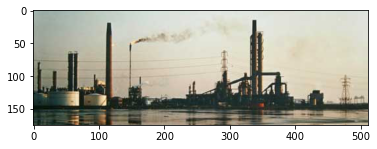

(512, 175)

In [4]:
filename = 'N_Tees_Image.png'

im = Image.open(os.path.join(source_dir, filename)) 
plt.imshow(im)
plt.show()
im.size

In [5]:
source_dir, results_dir

('source', 'results')

In [6]:
dims = (1, 4)
scale = 5
index, image_filenames = make_image_tiles(source_dir, results_dir, 
                                          filename, scale=scale, dims=dims)

assert(len(index) == dims[0]*dims[1])
    
{idx: filename for idx, filename in zip(index, image_filenames)}

{(0, 0): 'N_Tees_Image_crop_0_0.png',
 (0, 1): 'N_Tees_Image_crop_0_1.png',
 (0, 2): 'N_Tees_Image_crop_0_2.png',
 (0, 3): 'N_Tees_Image_crop_0_3.png'}

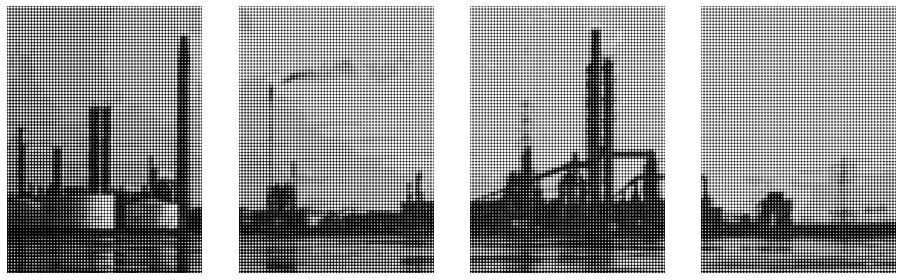

In [7]:
fig, axes = plt.subplots(dims[0], dims[1], figsize=(1+dims[1]*3, 1+dims[0]*3))

for ax, (row, col), filename in zip(axes, index, image_filenames):
    im = Image.open(os.path.join(results_dir, filename))
    h = halftone.Halftone(os.path.join(results_dir, filename))
    h.make(style="grayscale", antialias=True)
    name, ext = os.path.splitext(filename)
    im = Image.open(os.path.join(results_dir, f"{name}_halftoned.png"))
    ax.imshow(im)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Example 2

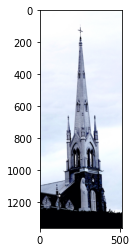

(512, 1360)

In [8]:
filename = '210720photo_eglise.jpg'

im = Image.open(os.path.join(source_dir, filename)) 
plt.imshow(im)
plt.show()
im.size

In [9]:
dims = (3, 1)
scale = 2
index, image_filenames = make_image_tiles(source_dir, results_dir,
                                          filename, scale=scale, dims=dims)

assert(len(index) == dims[0]*dims[1])
    
{idx: filename for idx, filename in zip(index, image_filenames)}

{(0, 0): '210720photo_eglise_crop_0_0.png',
 (1, 0): '210720photo_eglise_crop_1_0.png',
 (2, 0): '210720photo_eglise_crop_2_0.png'}

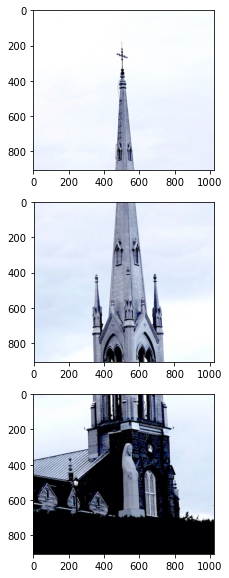

In [10]:
fig, axes = plt.subplots(dims[0], dims[1], figsize=(1+dims[1]*3, 1+dims[0]*3))

for ax, (row, col), filename in zip(axes, index, image_filenames):
    im = Image.open(os.path.join(results_dir, filename))
    ax.imshow(im)

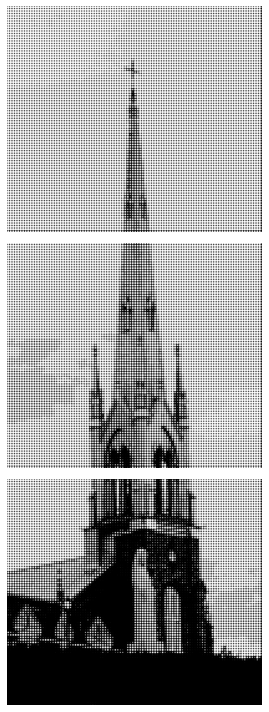

In [12]:
fig, axes = plt.subplots(dims[0], dims[1], figsize=(1+dims[1]*3, 1+dims[0]*3))

for ax, (row, col), filename in zip(axes, index, image_filenames):
    im = Image.open(os.path.join(results_dir, filename))
    h = halftone.Halftone(os.path.join(results_dir, filename))
    h.make(style="grayscale", antialias=True)
    name, ext = os.path.splitext(filename)
    im = Image.open(os.path.join(results_dir, f"{name}_halftoned.png"))
    ax.imshow(im)
    ax.axis('off')

plt.tight_layout()
plt.show()